In [208]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
from tensorflow.keras import layers

In [209]:
# Import dataset
df = pd.read_csv(r'psd_coffee.csv')
df.head()

,Country,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,...,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
0,Albania,1960,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,1961,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Albania,1962,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Albania,1963,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Albania,1964,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
# Only interested in 2023
df = df[df['Year'] >= 1960]

In [211]:
# Inspect data
print(df.dtypes)
print(df.isnull().sum())

Country                   object
Year                       int64
Arabica Production         int64
Bean Exports               int64
Bean Imports               int64
Beginning Stocks           int64
Domestic Consumption       int64
Ending Stocks              int64
Exports                    int64
Imports                    int64
Other Production           int64
Production                 int64
Roast & Ground Exports     int64
Roast & Ground Imports     int64
Robusta Production         int64
Rst,Ground Dom. Consum     int64
Soluble Dom. Cons.         int64
Soluble Exports            int64
Soluble Imports            int64
Total Distribution         int64
Total Supply               int64
dtype: object
Country                   0
Year                      0
Arabica Production        0
Bean Exports              0
Bean Imports              0
Beginning Stocks          0
Domestic Consumption      0
Ending Stocks             0
Exports                   0
Imports                   0
Other Product

In [212]:
# Distribution of each column
df.describe()

,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Exports,Imports,Other Production,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
count,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.00000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000,6016.000000
mean,1991.500000,744.343251,814.576130,372.732547,457.242686,673.035239,449.392287,895.636968,430.320479,2.21127,1130.501164,13.163065,10.648105,383.946642,588.521443,84.513797,67.897773,46.054355,2018.064495,2018.064328
std,18.474489,3349.259676,2897.359439,3052.833589,3116.051164,3309.043485,3039.644305,3166.527239,3109.893157,20.44888,4433.006465,122.365592,61.176816,1929.120607,3136.536532,377.995317,347.229671,299.676010,7468.535501,7468.535544
min,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1975.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1991.500000,0.000000,4.000000,0.000000,0.000000,14.000000,0.000000,9.000000,0.000000,0.00000,21.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,112.000000,112.000000
75%,2007.250000,200.000000,325.000000,0.000000,83.000000,227.000000,81.000000,439.000000,2.000000,0.00000,575.000000,0.000000,0.000000,27.000000,188.250000,1.000000,0.000000,0.000000,1105.250000,1105.250000
max,2023.000000,49700.000000,41689.000000,47000.000000,72461.000000,49070.000000,72461.000000,45675.000000,47000.000000,375.00000,69900.000000,2975.000000,1060.000000,30480.000000,47010.000000,6745.000000,4300.000000,6000.000000,97806.000000,97806.000000


In [213]:
# Generate training and test data and standardise data
X = df.drop('Exports', axis=1)
y = df['Exports']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
sc = MinMaxScaler(feature_range=(0,1))
numeric_columns = X_train.select_dtypes(include = ['int64']).columns
X_train = pd.DataFrame(sc.fit_transform(X_train[numeric_columns]), columns = numeric_columns)
X_test = pd.DataFrame(sc.transform(X_test[numeric_columns]), columns = numeric_columns)
X_train.head()

,Year,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Imports,Other Production,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Distribution,Total Supply
0,0.809524,0.00000,0.000000,0.024142,0.0,0.013812,0.0,0.024142,0.000000,0.020744,0.0,0.0,0.047572,0.000000,0.092661,0.453488,0.0,0.026802,0.026802
1,0.873016,0.00000,0.000000,0.030901,0.0,0.014696,0.0,0.030901,0.000000,0.031474,0.0,0.0,0.072178,0.000000,0.098592,0.691860,0.0,0.037887,0.037887
2,0.650794,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,0.000000,0.00000,0.000096,0.000000,0.0,0.000022,0.0,0.000000,0.010667,0.000072,0.0,0.0,0.000033,0.000023,0.000000,0.000000,0.0,0.000052,0.000052
4,0.079365,0.00002,0.000024,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000014,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000010,0.000010


In [214]:
# Concat export value into dataframe and remove irrelevant columns
y_train = y_train.reset_index()
X_train = X_train.drop(['Year', 'Other Production', 'Total Distribution'], axis=1)
merged_train = pd.concat([X_train, y_train], axis=1)
merged_train = merged_train.drop(['index'], axis=1)
y_train = y_train.drop(['index'], axis=1)
y_test = y_test.reset_index()
X_test = X_test.drop(['Year', 'Other Production', 'Total Distribution'], axis=1)
y_test = y_test.drop(['index'], axis=1)
merged_train.head()

,Arabica Production,Bean Exports,Bean Imports,Beginning Stocks,Domestic Consumption,Ending Stocks,Imports,Production,Roast & Ground Exports,Roast & Ground Imports,Robusta Production,"Rst,Ground Dom. Consum",Soluble Dom. Cons.,Soluble Exports,Soluble Imports,Total Supply,Exports
0,0.00000,0.000000,0.024142,0.0,0.013812,0.0,0.024142,0.020744,0.0,0.0,0.047572,0.000000,0.092661,0.453488,0.0,0.026802,1950
1,0.00000,0.000000,0.030901,0.0,0.014696,0.0,0.030901,0.031474,0.0,0.0,0.072178,0.000000,0.098592,0.691860,0.0,0.037887,2975
2,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0
3,0.00000,0.000096,0.000000,0.0,0.000022,0.0,0.000000,0.000072,0.0,0.0,0.000033,0.000023,0.000000,0.000000,0.0,0.000052,4
4,0.00002,0.000024,0.000000,0.0,0.000000,0.0,0.000000,0.000014,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000010,1


In [215]:
# Mutual Information Scores for Each Variable
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(merged_train.drop('Exports', axis=1), merged_train['Exports'])
print(mi_scores)

Bean Exports              3.115632
Production                1.539504
Total Supply              1.342366
Arabica Production        0.829573
Robusta Production        0.596733
Rst,Ground Dom. Consum    0.552294
Domestic Consumption      0.547241
Ending Stocks             0.539431
Beginning Stocks          0.533740
Soluble Exports           0.239808
Soluble Dom. Cons.        0.235697
Roast & Ground Exports    0.114491
Imports                   0.094348
Soluble Imports           0.087932
Bean Imports              0.071218
Roast & Ground Imports    0.061178
Name: MI Scores, dtype: float64


Text(0.5, 1.0, 'Correlation matrix')

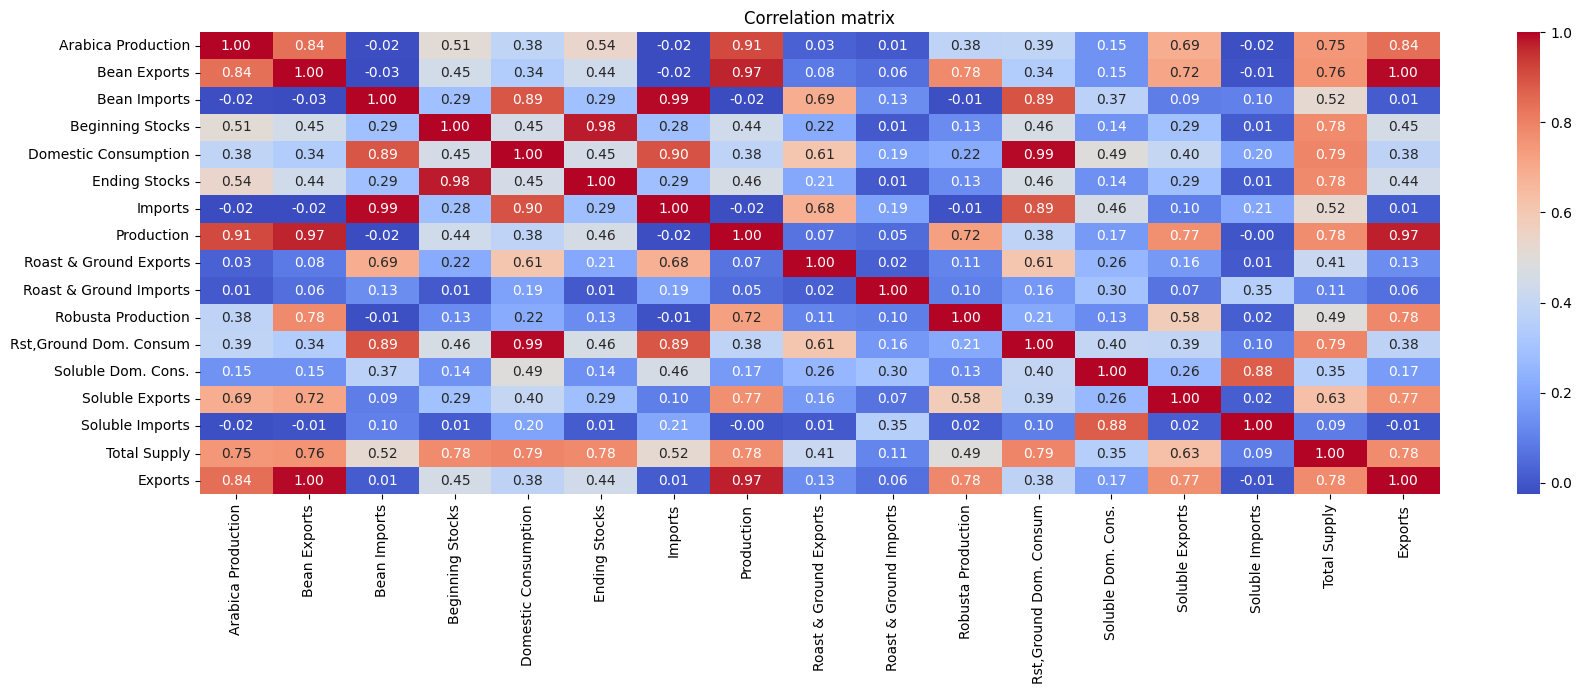

In [216]:
# Create heatmap
correlation_matrix = np.corrcoef(merged_train, rowvar=False)
plt.figure(figsize=(20,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            xticklabels=merged_train.columns, 
            yticklabels=merged_train.columns)
plt.title('Correlation matrix')

In [217]:
# Define PCA function
def apply_pca(features:list):
    X = merged_train.copy()
    y = X.pop('Exports')
    X = X.loc[:, features]
    pca = PCA()
    X_pca = pca.fit_transform(X)
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=component_names,
        index=X.columns,
    )
    return pca, X_pca, loadings

In [218]:
# Define plot variance function
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

                         PC1       PC2       PC3       PC4       PC5
Bean Exports        0.481436  0.124370 -0.351592  0.793179  0.000970
Arabica Production  0.417471 -0.559809 -0.338538 -0.315010 -0.546344
Robusta Production  0.354040  0.800005 -0.020408 -0.348968 -0.335340
Production          0.451164 -0.049084 -0.249614 -0.377731  0.767499
Soluble Exports     0.514824 -0.169497  0.836093  0.084708  0.000140


array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

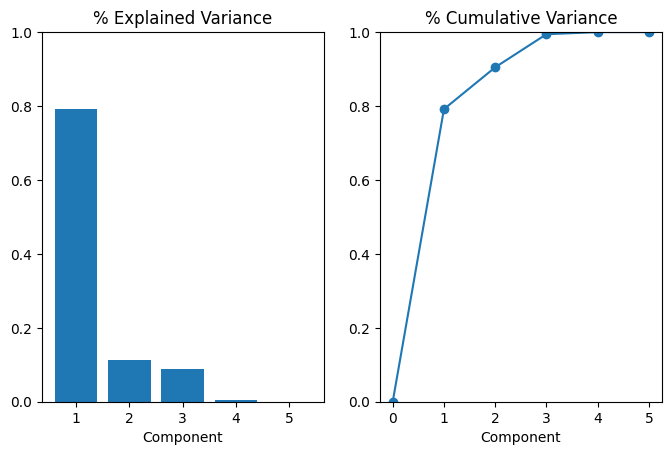

In [219]:
# Apply PCA on Bean Exports, Arabica Production, Robusta Production, Production and Soluble Exports
pca, X_pca, loadings = apply_pca(features=['Bean Exports', 'Arabica Production', 'Robusta Production', 'Production', 'Soluble Exports'])
print(loadings)
plot_variance(pca)

In [220]:
# MI scores for each of the principal components
mi_scores = make_mi_scores(X_pca, merged_train['Exports'])
mi_scores

PC1    1.712827
PC3    1.542116
PC2    1.417229
PC4    1.105170
PC5    0.944072
Name: MI Scores, dtype: float64

In [221]:
# Create Feature for PC1, PC2, PC3 in Test and Training data
X_train['PC1'] = ((loadings.loc['Bean Exports', 'PC1'] * X_train['Bean Exports'] + loadings.loc['Arabica Production', 'PC1'] * X_train['Arabica Production'])
+ (loadings.loc['Robusta Production', 'PC1'] * X_train['Robusta Production'] + loadings.loc['Production', 'PC1'] * X_train['Production'] + loadings.loc['Soluble Exports', 'PC1'] * X_train['Soluble Exports']))
X_test['PC1'] = ((loadings.loc['Bean Exports', 'PC1'] * X_test['Bean Exports'] + loadings.loc['Arabica Production', 'PC1'] * X_test['Arabica Production'])
+ (loadings.loc['Robusta Production', 'PC1'] * X_test['Robusta Production'] + loadings.loc['Production', 'PC1'] * X_test['Production'] + loadings.loc['Soluble Exports', 'PC1'] * X_test['Soluble Exports']))
# Create Feature for PC1 in Test and Training data
X_train['PC2'] = ((loadings.loc['Bean Exports', 'PC2'] * X_train['Bean Exports'] + loadings.loc['Arabica Production', 'PC2'] * X_train['Arabica Production'])
+ (loadings.loc['Robusta Production', 'PC2'] * X_train['Robusta Production'] + loadings.loc['Production', 'PC2'] * X_train['Production'] + loadings.loc['Soluble Exports', 'PC2'] * X_train['Soluble Exports']))
X_test['PC2'] = ((loadings.loc['Bean Exports', 'PC2'] * X_test['Bean Exports'] + loadings.loc['Arabica Production', 'PC2'] * X_test['Arabica Production'])
+ (loadings.loc['Robusta Production', 'PC2'] * X_test['Robusta Production'] + loadings.loc['Production', 'PC2'] * X_test['Production'] + loadings.loc['Soluble Exports', 'PC2'] * X_test['Soluble Exports']))
X_train['PC3'] = ((loadings.loc['Bean Exports', 'PC3'] * X_train['Bean Exports'] + loadings.loc['Arabica Production', 'PC3'] * X_train['Arabica Production'])
+ (loadings.loc['Robusta Production', 'PC3'] * X_train['Robusta Production'] + loadings.loc['Production', 'PC3'] * X_train['Production'] + loadings.loc['Soluble Exports', 'PC3'] * X_train['Soluble Exports']))
X_test['PC3'] = ((loadings.loc['Bean Exports', 'PC3'] * X_test['Bean Exports'] + loadings.loc['Arabica Production', 'PC3'] * X_test['Arabica Production'])
+ (loadings.loc['Robusta Production', 'PC3'] * X_test['Robusta Production'] + loadings.loc['Production', 'PC3'] * X_test['Production'] + loadings.loc['Soluble Exports', 'PC3'] * X_test['Soluble Exports']))

                             PC1       PC2       PC3       PC4       PC5  \
Total Supply            0.421105  0.602959 -0.323634  0.587475 -0.070031   
Bean Imports            0.394428 -0.378433  0.339708  0.242350 -0.512981   
Beginning Stocks        0.145278  0.410121  0.504641 -0.311143  0.069316   
Domestic Consumption    0.482209 -0.072696 -0.295389 -0.345724  0.553415   
Ending Stocks           0.144190  0.407032  0.501635 -0.165333  0.003469   
Imports                 0.402425 -0.386741  0.329926  0.325889  0.447405   
Rst,Ground Dom. Consum  0.480344 -0.067091 -0.278304 -0.496251 -0.469777   

                             PC6       PC7  
Total Supply            0.062677  0.020313  
Bean Imports            0.065060 -0.509606  
Beginning Stocks        0.673987  0.012588  
Domestic Consumption   -0.045770 -0.497039  
Ending Stocks          -0.730444 -0.031639  
Imports                -0.003771  0.522728  
Rst,Ground Dom. Consum -0.043843  0.467373  


array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

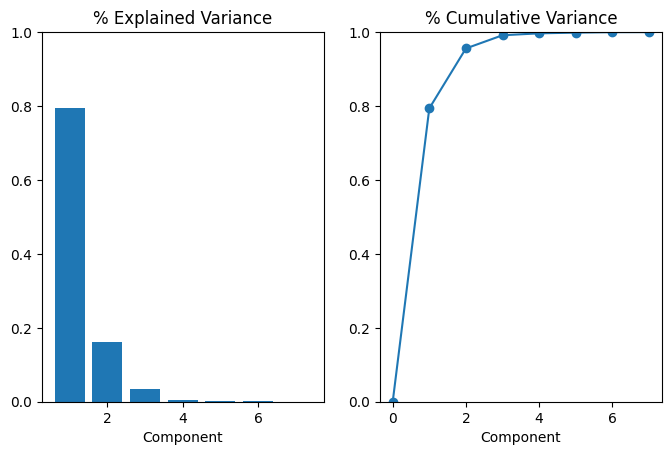

In [222]:
# Apply PCA on Total Supply, Bean Imports, Beginning Stocks, Domestic Consumption, Ending Stocks, Imports, Rst,Ground Dom. Consum
pca, X_pca, loadings = apply_pca(features=['Total Supply', 'Bean Imports', 'Beginning Stocks', 'Domestic Consumption', 'Ending Stocks', 'Imports', 'Rst,Ground Dom. Consum'])
print(loadings)
plot_variance(pca)

In [223]:
# MI scores for each of the principal components
mi_scores = make_mi_scores(X_pca, merged_train['Exports'])
mi_scores

PC2    1.341263
PC4    1.221809
PC7    1.129810
PC5    1.050214
PC1    0.995857
PC6    0.879898
PC3    0.811581
Name: MI Scores, dtype: float64

In [224]:
# Create Feature for PC2 in Test and Training data
X_train['PC4'] = ((loadings.loc['Total Supply', 'PC1'] * X_train['Total Supply'] + loadings.loc['Bean Imports', 'PC1'] * X_train['Bean Imports'])
+ (loadings.loc['Beginning Stocks', 'PC1'] * X_train['Beginning Stocks'] + loadings.loc['Domestic Consumption', 'PC1'] * X_train['Domestic Consumption'])
+ (loadings.loc['Ending Stocks', 'PC1'] * X_train['Ending Stocks'] + loadings.loc['Imports', 'PC1'] * X_train['Imports'] + loadings.loc['Rst,Ground Dom. Consum', 'PC1'] * X_train['Rst,Ground Dom. Consum']))
X_test['PC4'] = ((loadings.loc['Total Supply', 'PC1'] * X_test['Total Supply'] + loadings.loc['Bean Imports', 'PC1'] * X_test['Bean Imports'])
+ (loadings.loc['Beginning Stocks', 'PC1'] * X_test['Beginning Stocks'] + loadings.loc['Domestic Consumption', 'PC1'] * X_test['Domestic Consumption'])
+ (loadings.loc['Ending Stocks', 'PC1'] * X_test['Ending Stocks'] + loadings.loc['Imports', 'PC1'] * X_test['Imports'] + loadings.loc['Rst,Ground Dom. Consum', 'PC1'] * X_test['Rst,Ground Dom. Consum']))
X_train['PC5'] = ((loadings.loc['Total Supply', 'PC2'] * X_train['Total Supply'] + loadings.loc['Bean Imports', 'PC2'] * X_train['Bean Imports'])
+ (loadings.loc['Beginning Stocks', 'PC2'] * X_train['Beginning Stocks'] + loadings.loc['Domestic Consumption', 'PC2'] * X_train['Domestic Consumption'])
+ (loadings.loc['Ending Stocks', 'PC2'] * X_train['Ending Stocks'] + loadings.loc['Imports', 'PC2'] * X_train['Imports'] + loadings.loc['Rst,Ground Dom. Consum', 'PC2'] * X_train['Rst,Ground Dom. Consum']))
X_test['PC5'] = ((loadings.loc['Total Supply', 'PC2'] * X_test['Total Supply'] + loadings.loc['Bean Imports', 'PC2'] * X_test['Bean Imports'])
+ (loadings.loc['Beginning Stocks', 'PC2'] * X_test['Beginning Stocks'] + loadings.loc['Domestic Consumption', 'PC2'] * X_test['Domestic Consumption'])
+ (loadings.loc['Ending Stocks', 'PC2'] * X_test['Ending Stocks'] + loadings.loc['Imports', 'PC2'] * X_test['Imports'] + loadings.loc['Rst,Ground Dom. Consum', 'PC2'] * X_test['Rst,Ground Dom. Consum']))

In [225]:
# Remove columns from training and test data used in PC1 and PC2 so only PC1 + PC2 + other columns remain
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','Roast & Ground Exports', 'Roast & Ground Imports', 'Soluble Dom. Cons.', 'Soluble Imports']
X_train = X_train[columns]
X_test = X_test[columns]

[0]	validation_0-mae:1309.50659	validation_1-mae:1297.68997
[1]	validation_0-mae:1296.91514	validation_1-mae:1285.36117
[2]	validation_0-mae:1284.43170	validation_1-mae:1273.12495
[3]	validation_0-mae:1272.11680	validation_1-mae:1261.02840
[4]	validation_0-mae:1259.90182	validation_1-mae:1249.03717


[5]	validation_0-mae:1247.84180	validation_1-mae:1237.20279
[6]	validation_0-mae:1235.87754	validation_1-mae:1225.46769
[7]	validation_0-mae:1224.06129	validation_1-mae:1213.86082
[8]	validation_0-mae:1212.37299	validation_1-mae:1202.37702
[9]	validation_0-mae:1200.80842	validation_1-mae:1190.99834
[10]	validation_0-mae:1189.36372	validation_1-mae:1179.53444
[11]	validation_0-mae:1177.93857	validation_1-mae:1168.26499
[12]	validation_0-mae:1166.73866	validation_1-mae:1157.03209
[13]	validation_0-mae:1155.57203	validation_1-mae:1145.80961
[14]	validation_0-mae:1144.61256	validation_1-mae:1135.00748
[15]	validation_0-mae:1133.66418	validation_1-mae:1124.00552
[16]	validation_0-mae:1122.91457	validation_1-mae:1113.41038
[17]	validation_0-mae:1112.22523	validation_1-mae:1102.67722
[18]	validation_0-mae:1101.67546	validation_1-mae:1092.26837
[19]	validation_0-mae:1091.26901	validation_1-mae:1081.83693
[20]	validation_0-mae:1080.85213	validation_1-mae:1071.58866
[21]	validation_0-mae:1070.64

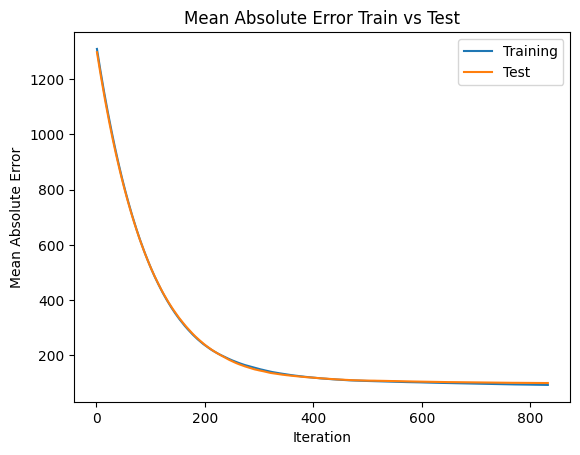

In [226]:
# Train using XGBoost and get results
model = XGBRegressor(n_estimators=2000, max_depth=4, min_child_weight=21, learning_rate=0.01, random_state=42, eval_metric='mae', early_stopping_rounds=10)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)
results = model.evals_result()
train_mae = results['validation_0']['mae']
test_mae = results['validation_1']['mae']

# Plot the line graph
plt.plot(range(1, len(train_mae) + 1), train_mae, label='Training')
plt.plot(range(1, len(test_mae) + 1), test_mae, label='Test')
plt.title('Mean Absolute Error Train vs Test')
plt.xlabel('Iteration')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [227]:
# Make Predictions on test data
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ', mae)

Mean Absolute Error:  100.30059752475589


Epoch 1/300


/mnt/c/Users/kpali/Documents/ML/Coffee-Kaggle/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 945.4247 - val_loss: 913.3924
Epoch 2/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 394.0529 - val_loss: 800.3159
Epoch 3/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 310.5859 - val_loss: 535.3922
Epoch 4/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 277.8806 - val_loss: 389.8376
Epoch 5/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 326.4076 - val_loss: 268.0833
Epoch 6/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 224.5857 - val_loss: 241.5768
Epoch 7/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 250.1650 - val_loss: 234.6195
Epoch 8/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 242.1034 - val_loss: 230.0649
Epoch 9/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 210.0815 - val_loss: 232.2478
Epoch 10/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 208.4147 - val_loss: 232.5417
Epoch 11/300
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 216.2188 - val_loss: 249.4519
Epoch 12/

<Axes: title={'center': 'Mean Absolute Error'}>

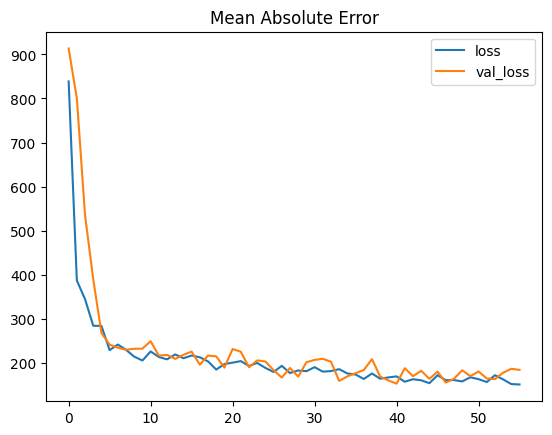

In [229]:
# Train and makes predictions on test data using ANN
model = keras.Sequential([
    layers.Dense(75, activation='relu', input_shape=[9]),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(75, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(75, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam',
loss='mae')

early_stopping = keras.callbacks.EarlyStopping(
    min_delta=0.001,
    patience=15,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    batch_size=32,
    epochs=300,
    callbacks=[early_stopping]
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Mean Absolute Error")